In [1]:
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
%matplotlib inline

# visualization
#import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


Train data: (891, 12)
Test data: (418, 11)


<AxesSubplot:>

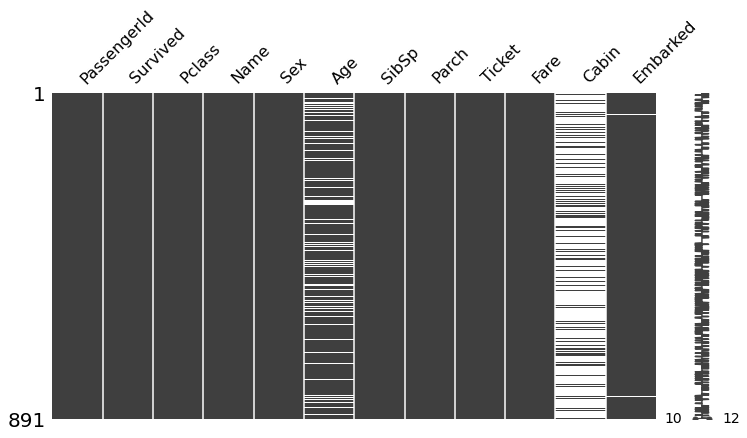

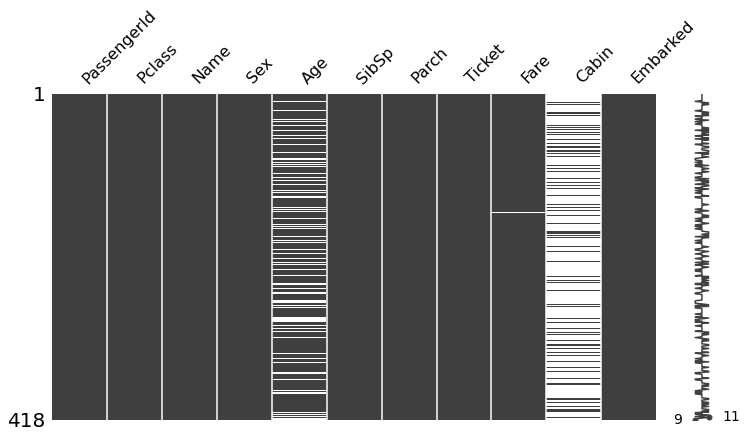

In [2]:
train_data = pd.read_csv("C:/R/titanic/train.csv")
print('Train data:', train_data.shape)
msno.matrix(train_data, figsize=(12, 6))

test_data = pd.read_csv("C:/R/titanic/test.csv")
print('Test data:', test_data.shape)
msno.matrix(test_data, figsize=(12, 6))


In [3]:
# Check Embarked feature (drop NaN rows)

#combi_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).count().sort_values(by='Survived', ascending=False)
train_data[train_data['Embarked'].isna()]
train_data = train_data.dropna(subset=['Embarked'])

test_data[test_data['Embarked'].isna()]

train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_data['Embarked'] = test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [4]:
# Check Fare feature (drop NaN rows)

train_data[train_data['Fare'].isna()]
train_data = train_data.dropna(subset=['Fare'])

test_data[test_data['Fare'].isna()]
test_data = test_data.dropna(subset=['Fare'])


In [5]:
# Create a new feature: Title

train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess', 'Dona'], 'Rare-Woman')
train_data['Title'] = train_data['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Rare-Man')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess', 'Dona'], 'Rare-Woman')
test_data['Title'] = test_data['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Rare-Man')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')

#train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare-Man": 5, "Rare-Woman": 6}
train_data['Title'] = train_data['Title'].map(title_mapping)
train_data['Title'] = train_data['Title'].fillna(0)
test_data['Title'] = test_data['Title'].map(title_mapping)
test_data['Title'] = test_data['Title'].fillna(0)


In [6]:
# Convert Sex to integer

train_data['Sex'] = train_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_data['Sex'] = test_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


In [7]:
# Age imputation and agebands

guess_ages = np.zeros((2,3))

for i in range(0, 2):
    for j in range(0, 3):
        guess_df = train_data[(train_data['Sex'] == i) & \
                              (train_data['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_df.median()
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

for i in range(0, 2):
    for j in range(0, 3):
        train_data.loc[ (train_data.Age.isnull()) & (train_data.Sex == i) & (train_data.Pclass == j+1), 'Age'] = guess_ages[i,j]

train_data['Age'] = train_data['Age'].astype(int)

#train_data.loc[ train_data['Age'] <= 16, 'Age'] = 0
#train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 32), 'Age'] = 1
#train_data.loc[(train_data['Age'] > 32) & (train_data['Age'] <= 48), 'Age'] = 2
#train_data.loc[(train_data['Age'] > 48) & (train_data['Age'] <= 64), 'Age'] = 3
#train_data.loc[ train_data['Age'] > 64, 'Age']


for i in range(0, 2):
    for j in range(0, 3):
        guess_df = test_data[(test_data['Sex'] == i) & \
                              (test_data['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_df.median()
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

for i in range(0, 2):
    for j in range(0, 3):
        test_data.loc[ (test_data.Age.isnull()) & (test_data.Sex == i) & (test_data.Pclass == j+1), 'Age'] = guess_ages[i,j]

test_data['Age'] = test_data['Age'].astype(int)

#test_data.loc[ test_data['Age'] <= 16, 'Age'] = 0
#test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 32), 'Age'] = 1
#test_data.loc[(test_data['Age'] > 32) & (test_data['Age'] <= 48), 'Age'] = 2
#test_data.loc[(test_data['Age'] > 48) & (test_data['Age'] <= 64), 'Age'] = 3
#test_data.loc[ test_data['Age'] > 64, 'Age']


In [8]:
# Create Familisize feature

train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1


In [9]:
# Create the Age*Pclass feature

#train_data['Age*Pclass'] = np.sqrt(train_data.Age) * train_data.Pclass
#test_data['Age*Pclass'] = np.sqrt(test_data.Age) * test_data.Pclass


In [10]:
# Create farebands

#train_data.loc[ train_data['Fare'] <= 7.91, 'Fare'] = 0
#train_data.loc[(train_data['Fare'] > 7.91)   & (train_data['Fare'] <= 14.454), 'Fare'] = 1
#train_data.loc[(train_data['Fare'] > 14.454) & (train_data['Fare'] <= 31), 'Fare']   = 2
#train_data.loc[ train_data['Fare'] > 31, 'Fare'] = 3
#train_data['Fare'] = train_data['Fare'].astype(int)

#test_data.loc[ test_data['Fare'] <= 7.91, 'Fare'] = 0
#test_data.loc[(test_data['Fare'] > 7.91)   & (test_data['Fare'] <= 14.454), 'Fare'] = 1
#test_data.loc[(test_data['Fare'] > 14.454) & (test_data['Fare'] <= 31), 'Fare']   = 2
#test_data.loc[ test_data['Fare'] > 31, 'Fare'] = 3
#test_data['Fare'] = test_data['Fare'].astype(int)


In [11]:
# Drop features not needed

train_data = train_data.drop(['Cabin', 'Name', 'Ticket', 'SibSp', 'Parch', 'Fare', 'PassengerId'], axis=1)
test_data = test_data.drop(['Cabin', 'Name', 'Ticket', 'SibSp', 'Parch', 'Fare'], axis=1)


Train data: (889, 7)
Test data: (417, 7)


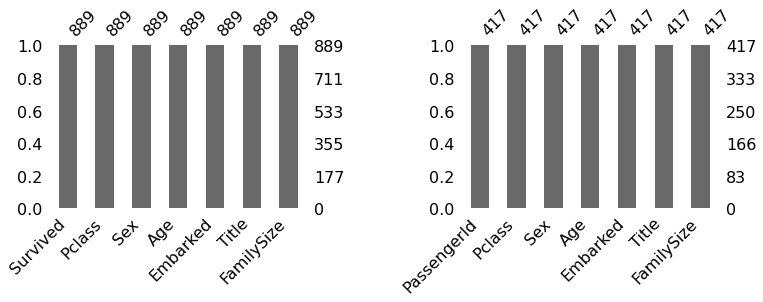

In [12]:
# Last check 

print('Train data:', train_data.shape)
print('Test data:', test_data.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))

msno.bar(train_data, figsize=(4, 2), ax=ax1)
msno.bar(test_data, figsize=(4, 2), ax=ax2)

plt.subplots_adjust(wspace=0.6)
plt.show()
fig.tight_layout()


In [13]:
train_data.head(5)

,Survived,Pclass,Sex,Age,Embarked,Title,FamilySize
0,0,3,0,22,0,1,2
1,1,1,1,38,1,3,2
2,1,3,1,26,0,2,1
3,1,1,1,35,0,3,2
4,0,3,0,35,0,1,1


In [14]:

X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


((889, 6), (889,), (417, 6))

In [15]:
# Logistic Regression

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

# max 82.11 / 81.89
# max 82.23 [Sex, Title, Embarked, Age, FamilySize, Pclass]

82.23

In [16]:
coeff_df = pd.DataFrame(train_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
1,Sex,2.221799
4,Title,0.481299
3,Embarked,0.206705
2,Age,-0.042447
5,FamilySize,-0.292122
0,Pclass,-1.192086


In [18]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('C:/R/titanic/submission.csv', index=False)